# Homework 1 (100 points)

The goal of this homework is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops

look through the pandas documentation for alternatives.

## Exercise 1 (60 points)

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

a) Write a function that reads in a filepath to a csv and returns the DataFrame. (5 points)

In [105]:
import pandas as pd

def read_df(fpath):
    return(pd.read_csv(fpath))

df = read_df('train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Write a function that returns the number of rows that have at least one empty column value - (2.5 points)

In [106]:
def num_nans(df):
    return_df = df.isna().sum(axis = 1) #creates series with number of NaN values
    return ((return_df != 0).sum())  #returns sum of rows with NaN values

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Write a function that removes all columns with more than 200 NaN values - (2.5 points)

In [107]:
def drop_na(df):        
    return (df.dropna(axis=1, thresh=(df.shape[0] - 200))) #thresh argument is inverse of requested function

df = drop_na(df)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Write a function that replaces `male` with 0 and `female` with 1 - (2.5 points)

In [108]:
def to_numerical(df):
    df_copy = df
    s = df_copy['Sex'].replace('male',0)
    s = s.replace('female',1)
    return(s)
    
df['Sex'] = to_numerical(df)  #Typo in instructors code!  changed from df['sex'] = to_numerical(df) to >>>>> df['Sex'] = to_numerical(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. - (5 points) 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [109]:
def extract_names(df):
    df_copy = df.copy(deep=True)

    #Scrub unnecessary text
    df_copy['Name'].replace('\([^)]*\)', '' , regex=True, inplace=True)  #removes all strings in parentheses
    df_copy['Name'].replace('\"[^)]*\"', '' , regex=True, inplace=True)  #removes all strings in quotes presumably nicknames

    #Title
    df_copy['Title'] = df_copy['Name']
    title_col = df_copy['Title']
    title_regex = title_col.str.extract(r'(,*.[a-zA-Z]+\.)', expand=True)
    df_copy['Title'] = title_regex[0].str[2:]
    df_copy['Title'] = df_copy['Title'].str[:-1]

    #Middle Name
    df_copy['Name'] = df_copy['Name'].apply(lambda x: f"{x} ") #regex below only works if a trailing space is added to each name string
    df_copy['Name'].replace('^(\S+\s+?){1,3}', '' , regex=True, inplace=True)  #regex extracts middle name no matter the length of words
    df_copy['Middle Name'] = df_copy['Name']

    #reset Name column
    df_copy['Name'] = df['Name']

    #Scrub unnecessary text
    df_copy['Name'].replace('\([^)]*\)', '' , regex=True, inplace=True)  #removes all strings in parentheses
    df_copy['Name'].replace('\"[^)]*\"', '' , regex=True, inplace=True)  #removes all strings in quotes presumably nicknames

    #First Name
    split_names = df['Name'].str.split(" ",expand=True)
    df_copy['First Name'] = split_names[2]

    #Last Name
    df_copy['Last Name'] = split_names[0].str[:-1] #removes comma from the end of last name

    return df_copy[['First Name', 'Middle Name', 'Last Name', 'Title']]

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr


f) Write a function that replaces all missing ages with the average age - (2.5 points)

In [110]:
def replace_with_mean(df):
    mean = df['Age'].mean()
    s = df['Age']

    return_s = s.fillna(mean)

    return(round(return_s, 1))

df['Age'] = replace_with_mean(df)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,William,Henry,Allen,Mr
5,6,0,3,"Moran, Mr. James",0,29.7,0,0,330877,8.4583,Q,James,,Moran,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,S,Timothy,J,McCarthy,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,S,Gosta,Leonard,Palsson,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,S,Oscar,W,Johnson,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,C,Nicholas,,Nasser,Mrs


The next set of questions focus on visualization. Please use pandas and [matplotlib](https://pypi.org/project/matplotlib/) for all plotting.

g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe. - (2.5 points)

<BarContainer object of 2 artists>

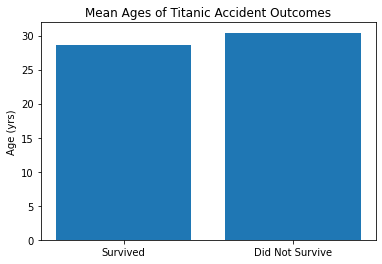

In [111]:
import matplotlib.pyplot as plt


survived_age = df.loc[df['Survived']==1,['Age']].mean() #1 equal to surviving
died_age = df.loc[df['Survived']==0,['Age']].mean() #0 equal to dead


x = ['Survived', 'Did Not Survive']
y = [float(survived_age), float(died_age)]

plt.title("Mean Ages of Titanic Accident Outcomes")
plt.ylabel("Age (yrs)")

plt.bar(x,y)

It appears that younger passengers had a higher survival rate.

h) Plot a bar chart of the proportion that survived for male and female. Briefly comment on what you observe. - (2.5 points)

<BarContainer object of 2 artists>

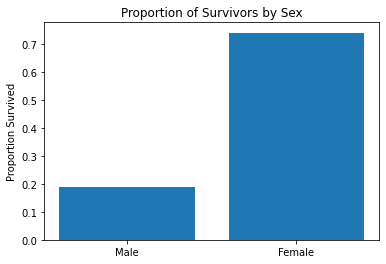

In [112]:
import matplotlib.pyplot as plt

survived = df.loc[df['Survived']==1]
not_survived = df.loc[df['Survived']==0]

male_survived = len(survived.loc[df['Sex']==0,['Sex']])
male_not_survived = len(not_survived.loc[df['Sex']==0,['Sex']])
female_survived = len(survived.loc[df['Sex']==1,['Sex']])
female_not_survived = len(not_survived.loc[df['Sex']==1,['Sex']])

male_proportion = male_survived/(male_survived + male_not_survived)
female_proportion = female_survived/(female_survived + female_not_survived)

x_h = ['Male', 'Female']
y_h = [male_proportion, female_proportion]

plt.title("Proportion of Survivors by Sex")
plt.ylabel("Proportion Survived")

plt.bar(x_h,y_h)



It appears that, as a proportion, males had a much lower survival rate than females.

i) Plot a bar chart of the proportion that survived for each title. Briefly comment on what you observe. - (5 points)

<BarContainer object of 16 artists>

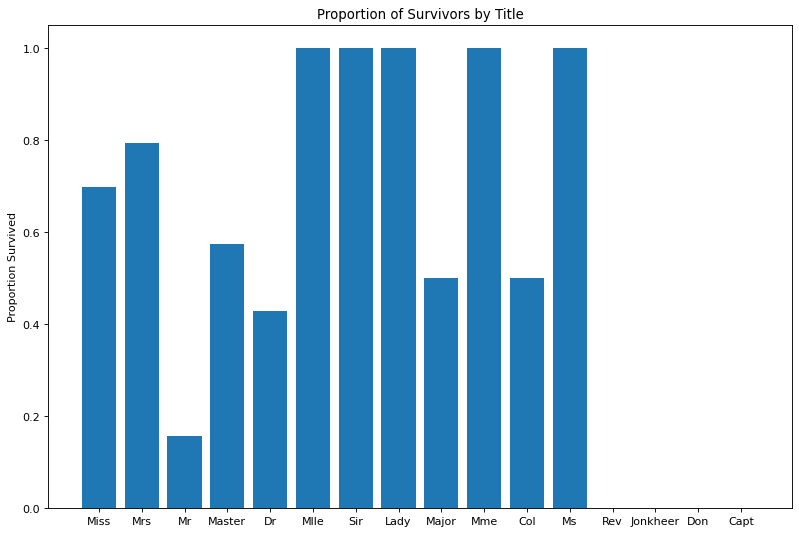

In [113]:
from matplotlib.pyplot import figure

df.at[759,'Title'] = 'Mrs' #cleans up a stubborn data entry

survived = df.loc[df['Survived']==1]
not_survived = df.loc[df['Survived']==0]

survived_counts = survived['Title'].value_counts()
not_survived_counts = not_survived['Title'].value_counts()
total_counts = df['Title'].value_counts()

i_df = pd.concat([survived_counts,not_survived_counts,total_counts], axis=1) #makes data frame with desired counts

i_df = i_df.fillna(0)

i_df['Proportion'] = (i_df.iloc[:,0]/i_df.iloc[:,2]) #proportion counts
i_df['Title_Names'] = i_df.index

i_x = i_df['Title_Names']
i_y = i_df['Proportion']

plt.figure(figsize=(12, 8), dpi=80)

plt.title("Proportion of Survivors by Title")
plt.ylabel("Proportion Survived")

plt.bar(i_x,i_y)

It appears that "Mr" had a much lower survival rate compared to the rest.  Miss and Mrs had the highest proportion of survival (sans proceeding disclaimer). The data is misleading as there were few entries from Dr to Capt (I would omit these in a formal analysis).

j) Plot a bar chart of the average fare for those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

<BarContainer object of 2 artists>

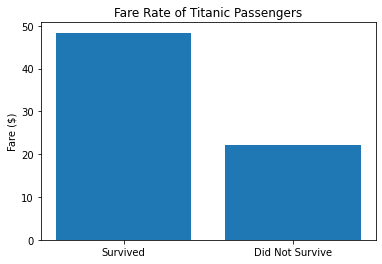

In [114]:
survived = df.loc[df['Survived']==1,'Fare'].mean()
not_survived = df.loc[df['Survived']==0, 'Fare'].mean()

j_x = ['Survived', 'Did Not Survive']
j_y = [survived, not_survived]


plt.title("Fare Rate of Titanic Passengers")
plt.ylabel("Fare ($)")

plt.bar(j_x,j_y)

It appears that those that survived paid a higher fare on average.

k) Create a boxplot for the fare of those that survived and those that did not survive. Briefly comment on what you observe. - (5 points)

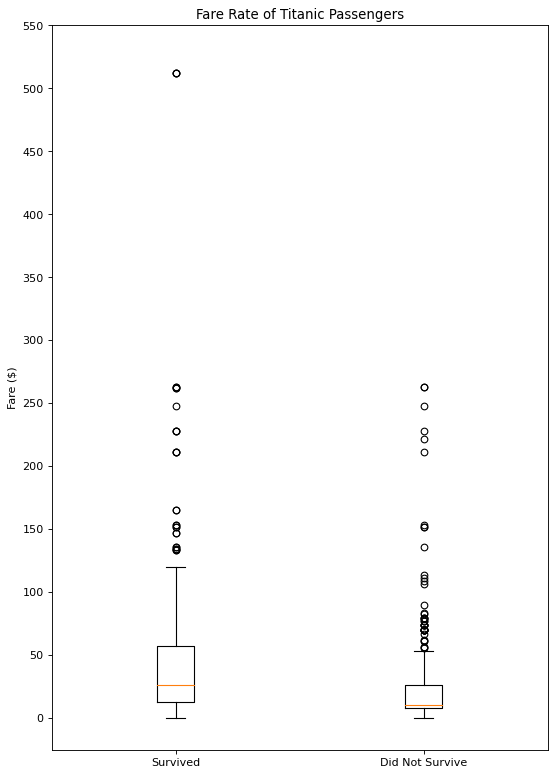

In [115]:
from matplotlib.pyplot import figure

survived = df.loc[df['Survived']==1,'Fare']
not_survived = df.loc[df['Survived']==0, 'Fare']

k_x = ['Survived', 'Did Not Survive']
k_y = [survived, not_survived]

plt.figure(figsize=(8, 12), dpi=80)
plt.title("Fare Rate of Titanic Passengers")
plt.ylabel("Fare ($)")



plt.boxplot(k_y)

plt.xticks([1, 2], ['Survived', 'Did Not Survive'])
plt.yticks(range(0,600,50))


plt.show()

It appears the that those that survived had a wider distribution of fare amount compared to those that did not survive.  The maximum value in Survived is also an interesting data point.

k) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation - (2.5 points)

In [116]:
def fare_normalization(df):
    """Subtracts mean from Fare column and divides by standard deviation of Fare column of df."""
    return (df["Fare"] - df["Fare"].mean())/df["Fare"].std()

df['Fare'] = fare_normalization(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,-0.502163,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,0.786404,C,John,Bradley,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,-0.488580,S,Laina,,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0.420494,S,Jacques,Heath,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,-0.486064,S,William,Henry,Allen,Mr


l) Remove all non-numerical columns from the dataframe. - (2.5 points)

In [117]:
df = df.set_index('Name')  #sets row indexes for later identification 

df = df.select_dtypes(include=['float64', 'int64'])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Name,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,0,22.0,1,0,-0.502163
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,1,38.0,1,0,0.786404
"Heikkinen, Miss. Laina",3,1,3,1,26.0,0,0,-0.488580
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,1,35.0,1,0,0.420494
"Allen, Mr. William Henry",5,0,3,0,35.0,0,0,-0.486064


m) Ignoring passenger ID, write a function that returns the names of the N most similar passengers using the euclidean distance? - (15 points)

In [118]:
def N_most_similar(df, N):
    from scipy.spatial.distance import pdist, squareform

    index_list = df.index # Save for naming rows/columns

    # Calculate euclidiean distance and create a square matrix
    distances = pdist(df.values, metric='euclidean')
    dist_matrix = squareform(distances)

    # Convert to df
    dist_matrix_df = pd.DataFrame(dist_matrix, columns = index_list, index = index_list)

    # Unstack to long form A/B comparison
    AB_long_df = dist_matrix_df.unstack()

    # Create df of long form
    AB_long_df.index.rename(['Person A', 'Person B'], inplace=True)
    AB_long_df = AB_long_df.to_frame('Distance').reset_index()

    # Remove all rows that have the same person as Person A and Person B
    AB_long_df = AB_long_df.drop(AB_long_df[AB_long_df['Person A'] == AB_long_df['Person B']].index)

    # Sort based on lowest distance
    AB_long_df = AB_long_df.sort_values('Distance')

    # Creates one column with both names paired together
    AB_long_df['Grouped'] = AB_long_df['Person A'] + ' & ' + AB_long_df['Person B']

    #Creates a list of the top N names
    return_list = AB_long_df['Grouped'].head(N).values.flatten().tolist()

    return return_list

print("The 3 most similar passengers are: " + str(N_most_similar(df, 3)))

The 3 most similar passengers are: ['Mockler, Miss. Helen Mary "Ellie" & McGovern, Miss. Mary', 'Ivanoff, Mr. Kanio & Nankoff, Mr. Minko', 'Troupiansky, Mr. Moses Aaron & Berriman, Mr. William John']


## Exercise 2 - (40 points)

Another way to get data is by using APIs. Here we will be using the google books API (https://developers.google.com/books/docs/overview)

a) Create a list with these topic strings: Python; Data Science; Data Analysis; Machine Learning; and Deep 
Learning. Use these topics, one at a time, to query the Google Books API by modifying the code below. - (5 points)

In [119]:
import requests
import json

"""
    Google Books Api
    See: https://developers.google.com/books/
"""

def get(topic=""):
    BASEURL = 'https://www.googleapis.com/books/v1/volumes'
    headers = {'Content-Type': 'application/json'}

    response = requests.get(BASEURL + "?q=" + topic, headers=headers)

    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))

    return response

python = get('python')
data_science = get('data science')
data_analytics = get('data analytics')
machine_learning = get('machine learning')
deep_learning = get('deep learning')

topics = [python, data_science, data_analytics, machine_learning, deep_learning]

b) For each returned JSON string: Convert the JSON string to a dict using `loads( )` then use this to convert it to a DataFrame: `pd.json_normalize( thedict['items'] )`. Then save them as `.csv`. - (5 points)

In [120]:
#Each JSON string was already converted to dict using loads in preceding function

python_df = pd.json_normalize(python['items'])
python_df.to_csv('python.csv', index=False)

data_science_df = pd.json_normalize(data_science['items'])
data_science_df.to_csv('data_science.csv', index=False) 

data_analytics_df = pd.json_normalize(data_analytics['items'])
data_analytics_df.to_csv('data_analytics.csv', index=False) 

machine_learning_df = pd.json_normalize(machine_learning['items'])
machine_learning_df.to_csv('machine_learning.csv', index=False) 

deep_learning_df = pd.json_normalize(deep_learning['items'])
deep_learning_df.to_csv('deep_learning.csv', index=False)

c) For each DataFrame, relabel `volumeInfo.title` as `Title` and `volumeInfo.authors` as `Authors`. - (5 points)

In [121]:
python_df.rename(columns={"volumeInfo.title": "Title", "volumeInfo.authors": "Authors"}, inplace=True)

data_science_df.rename(columns={"volumeInfo.title": "Title", "volumeInfo.authors": "Authors"}, inplace=True)

data_analytics_df.rename(columns={"volumeInfo.title": "Title", "volumeInfo.authors": "Authors"}, inplace=True)

machine_learning_df.rename(columns={"volumeInfo.title": "Title", "volumeInfo.authors": "Authors"}, inplace=True)

deep_learning_df.rename(columns={"volumeInfo.title": "Title", "volumeInfo.authors": "Authors"}, inplace=True)

d) For each DataFrame create a new column called `Topic` with the name of the topic from the API query above. Then merge all DataFrames into one and save it to a new `.csv` file. - (10 points)

In [122]:
python_df['Topic'] = 'Python'

data_science_df['Topic'] = 'Data Science'

data_analytics_df['Topic'] = 'Data Analytics'

machine_learning_df['Topic'] = 'Machine Learning'

deep_learning_df['Topic'] = 'Deep Learning'

merged_df = pd.concat([python_df, data_science_df, data_analytics_df, machine_learning_df, deep_learning_df])

merged_df.to_csv('merged_df.csv', index=False)

e) Write a function that returns all rows whose `Title` contains the word `Data` (case incensitive). - (5 points)

In [123]:
def data_row_extractor(df):
    """Extracts all rows that contain the word 'Data'(case insensitive)."""
    return(df.loc[df['Title'].str.contains('Data', case=False)==True,:])

merged_df_data_rows = data_row_extractor(merged_df)

merged_df_data_rows.head()  #full df has 21 rows

,kind,id,etag,selfLink,Title,volumeInfo.subtitle,Authors,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,volumeInfo.categories,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,accessInfo.epub.acsTokenLink,Topic,accessInfo.pdf.acsTokenLink
0,books#volume,vfi3DQAAQBAJ,tF3IwpsBsGg,https://www.googleapis.com/books/v1/volumes/vf...,R for Data Science,"Import, Tidy, Transform, Visualize, and Model ...","[Hadley Wickham, Garrett Grolemund]",2016-12-12,"""This book introduces you to R, RStudio, and t...","[{'type': 'ISBN_13', 'identifier': '9781491910...",...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Science,NaN
1,books#volume,TFpVDwAAQBAJ,Ol72npp8NUs,https://www.googleapis.com/books/v1/volumes/TF...,Data Science,NaN,"[John D. Kelleher, Brendan Tierney]",2018-04-13,A concise introduction to the emerging field o...,"[{'type': 'ISBN_13', 'identifier': '9780262535...",...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Science,NaN
2,books#volume,xb29DwAAQBAJ,LxcZbNpi8pA,https://www.googleapis.com/books/v1/volumes/xb...,Introduction to Data Science,Data Analysis and Prediction Algorithms with R,[Rafael A. Irizarry],2019-11-20,Introduction to Data Science: Data Analysis an...,"[{'type': 'ISBN_13', 'identifier': '9781000708...",...,[Mathematics],NaN,NaN,NaN,NaN,NaN,NaN,http://books.google.com/books/download/Introdu...,Data Science,http://books.google.com/books/download/Introdu...
3,books#volume,6omNDQAAQBAJ,2m0o+fYkbPg,https://www.googleapis.com/books/v1/volumes/6o...,Python Data Science Handbook,Essential Tools for Working with Data,[Jake VanderPlas],2016-11-21,"For many researchers, Python is a first-class ...","[{'type': 'ISBN_13', 'identifier': '9781491912...",...,[Computers],59.99,USD,59.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",NaN,Data Science,NaN
4,books#volume,JYodCAAAQBAJ,OVXZPZyhRi8,https://www.googleapis.com/books/v1/volumes/JY...,Data Science from Scratch,First Principles with Python,[Joel Grus],2015-04-14,"Data science libraries, frameworks, modules, a...","[{'type': 'ISBN_13', 'identifier': '9781491904...",...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Science,NaN


f) Write a function that returns all rows whose `Authors` first or last name starts with the letter `E` - (10 points)

In [124]:
def author_rows_E(df):

    # Make series into list and remove list of list containing strings to reveal strings
    l = df['Authors'].tolist()

    joined = list(map(', '.join, l))

    # Preparing to wrangle
    authors_s = pd.Series(joined)

    df.reset_index(inplace=True, drop = True)

    authors_s = pd.DataFrame(joined)
    authors_s.rename(columns={ authors_s.columns[0]: "Name" }, inplace = True)

    # Split name columns and remove everything but first charachter of each name (excluding middle initial)
    split_name = authors_s['Name'].str.split(' ', expand = True)

    split_name = split_name.apply(lambda x: x.str[:-2])

    new_split = split_name.apply(lambda x: x.str[0])

    new_split = new_split.fillna('')

    # Create a name_key column that has only first letter of first/last name  i.e.  A for one author or AAA for 3 authors

    new_split['Combined'] = new_split.apply(lambda row: ''.join(row.values.astype(str)), axis=1)

    merged_df['Name_Key'] = new_split['Combined']

    # Extracts all rows with corresponding name key

    return_df_raw = df.loc[df['Name_Key'].str.contains('E') == True]

    return_df = return_df_raw.drop('Name_Key', axis=1)

    return(return_df)



E_selected_df = author_rows_E(merged_df)

E_selected_df


,kind,id,etag,selfLink,Title,volumeInfo.subtitle,Authors,volumeInfo.publishedDate,volumeInfo.description,volumeInfo.industryIdentifiers,...,volumeInfo.categories,saleInfo.listPrice.amount,saleInfo.listPrice.currencyCode,saleInfo.retailPrice.amount,saleInfo.retailPrice.currencyCode,saleInfo.buyLink,saleInfo.offers,accessInfo.epub.acsTokenLink,Topic,accessInfo.pdf.acsTokenLink
16,books#volume,UG76DwAAQBAJ,YqvMN1AV2TU,https://www.googleapis.com/books/v1/volumes/UG...,Data Science in Education Using R,NaN,"[Ryan A. Estrellado, Emily A. Freer, Jesse Mos...",2020-10-26,Data Science in Education Using R is the go-to...,"[{'type': 'ISBN_13', 'identifier': '9781000200...",...,[Education],48.95,USD,37.69,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",http://books.google.com/books/download/Data_Sc...,Data Science,http://books.google.com/books/download/Data_Sc...
18,books#volume,xDszEAAAQBAJ,qQyw50NGVlk,https://www.googleapis.com/books/v1/volumes/xD...,Build a Career in Data Science,NaN,"[Emily Robinson, Jacqueline Nolis]",2020-03-06,Summary You are going to need more than techni...,"[{'type': 'ISBN_13', 'identifier': '9781638350...",...,[Computers],28.99,USD,28.99,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",http://books.google.com/books/download/Build_a...,Data Science,NaN
23,books#volume,J94WBgAAQBAJ,Er4Y8T1Li/Q,https://www.googleapis.com/books/v1/volumes/J9...,Data Science and Big Data Analytics,"Discovering, Analyzing, Visualizing and Presen...",[EMC Education Services],2015-01-05,Data Science and Big Data Analytics is about h...,"[{'type': 'ISBN_13', 'identifier': '9781118876...",...,[Computers],48.00,USD,48.00,USD,https://play.google.com/store/books/details?id...,"[{'finskyOfferType': 1, 'listPrice': {'amountI...",http://books.google.com/books/download/Data_Sc...,Data Analytics,http://books.google.com/books/download/Data_Sc...
25,books#volume,QLblBQAAQBAJ,9C/hDgz0XV0,https://www.googleapis.com/books/v1/volumes/QL...,Data Science and Big Data Analytics,"Discovering, Analyzing, Visualizing and Presen...",[EMC Education Services],2015-01-27,Data Science and Big Data Analytics is about h...,"[{'type': 'ISBN_13', 'identifier': '9781118876...",...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Analytics,NaN
33,books#volume,NP5bBAAAQBAJ,Bip6Bu5p5cQ,https://www.googleapis.com/books/v1/volumes/NP...,Introduction to Machine Learning,NaN,[Ethem Alpaydin],2014-08-29,The goal of machine learning is to program com...,"[{'type': 'ISBN_13', 'identifier': '9780262028...",...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Machine Learning,NaN
34,books#volume,AGQ4DQAAQBAJ,UjBUkJpYtyQ,https://www.googleapis.com/books/v1/volumes/AG...,Machine Learning,The New AI,[Ethem Alpaydin],2016-10-07,A concise overview of machine learning—compute...,"[{'type': 'ISBN_13', 'identifier': '9780262529...",...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Machine Learning,NaN
45,books#volume,LrT4DwAAQBAJ,oDXXbPD4S+g,https://www.googleapis.com/books/v1/volumes/Lr...,Introduction to Deep Learning,NaN,[Eugene Charniak],2019-01-29,A project-based guide to the basics of deep le...,"[{'type': 'ISBN_13', 'identifier': '9780262039...",...,[Computers],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deep Learning,NaN
